### Import Important Libraries

In [2]:
import mlflow
import numpy as np
import pandas as pd
import mlflow.sklearn
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder , RobustScaler , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , StratifiedKFold
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.metrics import classification_report , confusion_matrix 

In [3]:
#importing the data and overview 
df= pd.read_csv(r"C:\Users\DELL\Downloads\archive\Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['PassengerId' , 'Cabin'] , axis = 1 , inplace = True)

In [8]:
df.shape

(891, 10)

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df['Survived'].value_counts()

# survived = 1
# didn't survive = 0

0    549
1    342
Name: Survived, dtype: int64

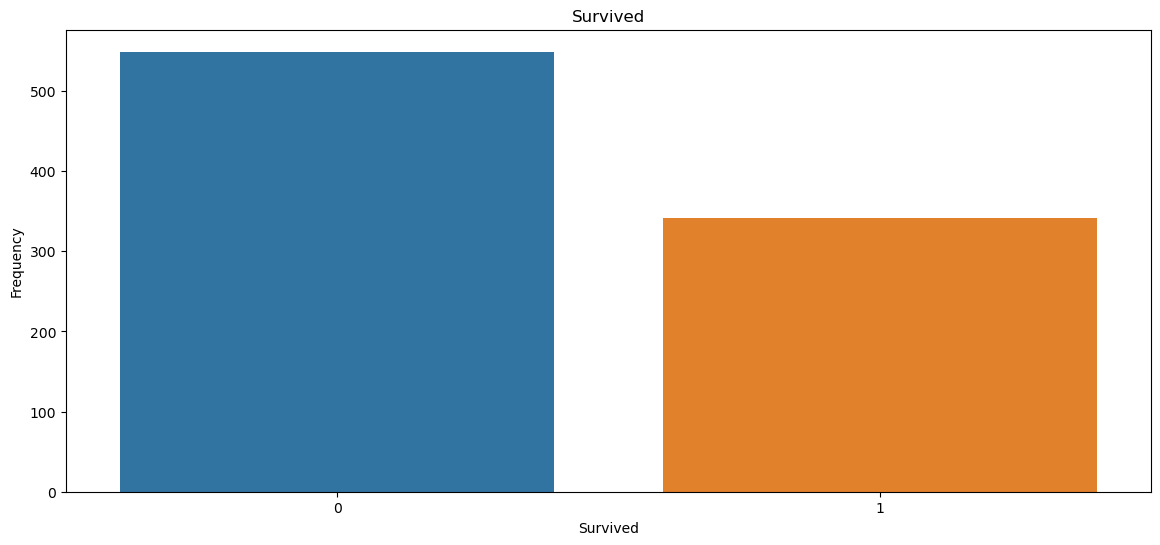

In [11]:
# survived = 1
# didn't survive = 0

plt.figure(figsize=(14,6))
sns.countplot(data = df, x = 'Survived')
plt.title('Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9648\943020963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


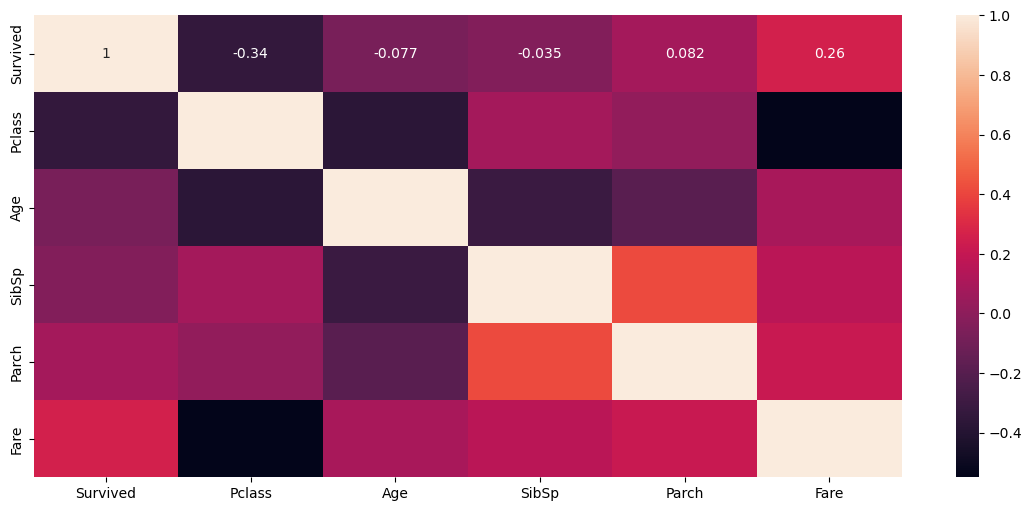

In [12]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
#Data preparation
#looking for null values and taking care of them

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [14]:
df['Title'] = df['Name'].str.split('.').str[0]
df['Title'] = df['Title'].str.split(',').str[1]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [15]:
df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

In [16]:
# fill the nans in "Age" with "Title"
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [17]:
# fill the nans in "Embarked" with "mode"
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [19]:
# deal with categorical data in "Sex" col (hint: do some encoding or replace the object values with int)
# Handle Sex column by One Hot Encoding
df = pd.get_dummies(df , columns = ['Sex'] , drop_first = True)

In [20]:
df.drop(['Name', 'Fare', 'Title', 'Ticket','Embarked'], axis = 1, inplace = True)

In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Sex_male    0
dtype: int64

In [22]:
#defining features and the label

x = df.drop('Survived', axis=1)
y = df['Survived']

In [23]:
#spliting the dataset to work on train and test
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42 , stratify = y)

In [24]:
x_train.describe()

,Pclass,Age,SibSp,Parch,Sex_male
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.319422,29.682055,0.457464,0.377207,0.651685
std,0.830909,13.303862,0.964501,0.841409,0.476819
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,0.000000
50%,3.000000,30.000000,0.000000,0.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


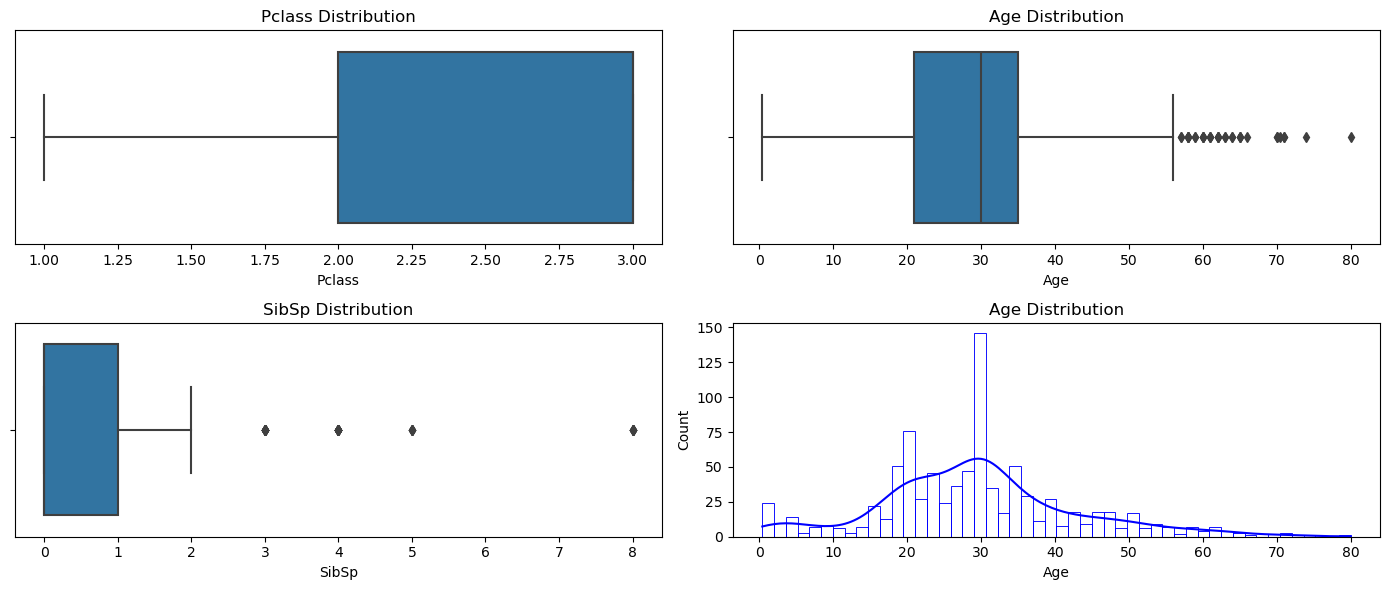

In [25]:
# subplot
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.boxplot(data = df , x = 'Pclass')
plt.title('Pclass Distribution')
plt.xlabel('Pclass')

plt.subplot(2,2,2)
sns.boxplot(data = df , x = 'Age')
plt.title('Age Distribution')
plt.xlabel('Age')

plt.subplot(2,2,3)
sns.boxplot(data = df , x = 'SibSp')
plt.title('SibSp Distribution')
plt.xlabel('SibSp')

plt.subplot(2,2,4)
sns.histplot(df['Age'] , bins = 50 , edgecolor = 'green' , color = 'blue', fill = False , kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [26]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [27]:
#feature scaling
scaler = RobustScaler()

x_train_resampled = scaler.fit_transform(x_train_resampled)
x_test = scaler.transform(x_test)

In [28]:
#training the model

# SVM without parameter
svm = SVC(random_state = 42)
svm.fit(x_train_resampled, y_train_resampled)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
#predicting test
y_pred = svm.predict(x_test)

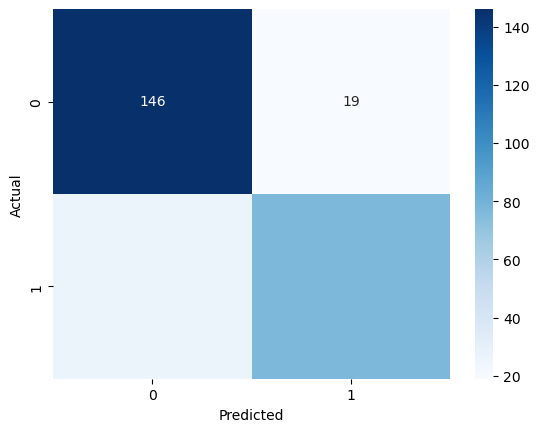

In [30]:
#applaing the confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("-" * 40)
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

# Evaluate model
evaluate_model(y_test, y_pred, "SVM (without parameter)")

----------------------------------------
SVM (without parameter) Results:
Accuracy: 0.8321
Precision: 0.8021
Recall: 0.7476
F1 Score: 0.7739
----------------------------------------


In [32]:
#print the classification_report

print("Classification Report (without parameter):")
print(classification_report(y_test, y_pred))

Classification Report (without parameter):
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       165
           1       0.80      0.75      0.77       103

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [33]:
# ----- MLflow Run for default SVM -----
with mlflow.start_run(run_name="SVM_Default"):

    svm_model = svm

    y_pred_default = svm_model.predict(x_test)

    acc = accuracy_score(y_test, y_pred_default)
    prec = precision_score(y_test, y_pred_default)
    rec = recall_score(y_test, y_pred_default)
    f1 = f1_score(y_test, y_pred_default)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    mlflow.log_param("kernel", svm_model.kernel)
    mlflow.log_param("C", svm_model.C)
    mlflow.log_param("gamma", svm_model.gamma)

    mlflow.sklearn.log_model(svm_model, "SVM (without parameter)")

print("MLflow logging for SVM default model done.")


2025/11/08 18:11:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 18:13:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for SVM default model done.


In [34]:
#Hyperparameters
# SVM
svm = SVC(random_state=42)

# Definition of hyperparameters grid
param_grid = {
    'C': np.arange(0.1, 1.5, 0.5),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# We use StratifiedKFold to ensure balance in classes within each split.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator = svm,
    param_grid = param_grid,
    cv = cv_strategy,                   # Number of folds in cross-validation
    scoring = 'f1',     
    n_jobs = -1,              
    verbose = 2
)

In [35]:
# train the model after applaying the GridSearchCV
grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': array([0.1, 0.6, 1.1]), 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.6


In [36]:
# print the best estimator (best model)
best_svm = grid_search.best_estimator_
print(best_svm)

SVC(C=0.6, gamma='auto', random_state=42)


In [37]:
# print the best params
print("Best Parameters:", grid_search.best_params_)
print("Best F1:", grid_search.best_score_)

Best Parameters: {'C': 0.6, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1: 0.8138972441701927


In [38]:
# use the model for predection
y_pred_best = best_svm.predict(x_test)

In [39]:
print("Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")

Test Set Evaluation:
Accuracy: 0.8209
Precision: 0.7957
Recall: 0.7184
F1 Score: 0.7551


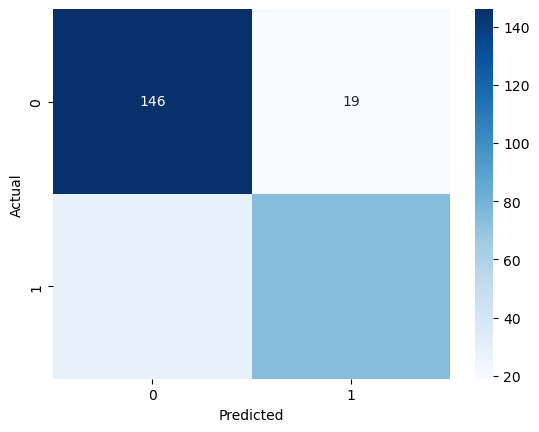

In [40]:
# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
#print the classification_report
print("Classification Report (with GridSearchCV):")
print(classification_report(y_test, y_pred_best))

Classification Report (with GridSearchCV):
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       165
           1       0.80      0.72      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [44]:
# ----- MLflow Run for SVM GridSearch -----
with mlflow.start_run(run_name="SVM_GridSearch"):

    grid_model = grid_search

    best_model = grid_model.best_estimator_

    mlflow.log_params(grid_model.best_params_)

    y_pred_grid = best_model.predict(x_test)

    acc = accuracy_score(y_test, y_pred_grid)
    prec = precision_score(y_test, y_pred_grid)
    rec = recall_score(y_test, y_pred_grid)
    f1 = f1_score(y_test, y_pred_grid)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    mlflow.sklearn.log_model(best_model, "SVM (with GridSearchCV)")

print("MLflow logging for GridSearch SVM done.")


2025/11/08 18:14:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 18:14:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for GridSearch SVM done.
